# Exploring Dandiset 001375: Septum GABA disruption with DREADDs

**Disclaimer:** This notebook was automatically generated by an AI assistant (Minicline) to facilitate exploration of Dandiset 001375. While efforts have been made to ensure accuracy, the code and interpretations provided have not been fully verified by human experts. Please exercise caution and critically evaluate the results before drawing scientific conclusions.

## Overview

This notebook demonstrates how to access and explore data from Dandiset 001375, available on the DANDI Archive.

**Dandiset Link:** [https://dandiarchive.org/dandiset/001375/draft](https://dandiarchive.org/dandiset/001375/draft)

**Description:** This Dandiset contains data from a pilot study investigating the effect of disrupting septal GABAergic activity using DREADDs on hippocampal and neocortical activity in mice running laps in a virtual hallway. The data includes extracellular electrophysiology recordings and sorted neuronal units.

## Notebook Goals

This notebook will guide you through:
1.  Connecting to the DANDI Archive and retrieving Dandiset metadata.
2.  Listing the assets (files) within the Dandiset.
3.  Loading neurophysiology data from a specific NWB (Neurodata Without Borders) file within the Dandiset.
4.  Exploring and visualizing different data types, including:
    *   Trial information (start/stop times).
    *   Sorted neuronal unit spike times (raster plot).
    *   Raw extracellular electrophysiology recordings.

## Required Packages

The following Python packages are required to run this notebook. It is assumed they are already installed in your environment.

*   `dandi` (for interacting with the DANDI Archive)
*   `pynwb` (for reading NWB files)
*   `h5py` (dependency for pynwb)
*   `remfile` (for streaming remote files)
*   `numpy` (for numerical operations)
*   `pandas` (for data manipulation, particularly with tables)
*   `matplotlib` (for plotting)
*   `seaborn` (for enhanced visualizations)

We will explicitly import these packages as needed in the code cells.

## 1. Connecting to DANDI and Loading Dandiset Information

We start by using the `DandiAPIClient` to connect to the DANDI Archive and fetch metadata about Dandiset 001375.

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
print("Connecting to DANDI Archive...")
client = DandiAPIClient()
dandiset = client.get_dandiset("001375")
print("Connected.")

# Print basic information about the Dandiset
print("\nFetching Dandiset metadata...")
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata.get('name', 'N/A')}")
print(f"Dandiset URL: {metadata.get('url', 'N/A')}")
print(f"Description: {metadata.get('description', 'N/A')}")

# List the assets in the Dandiset
print("\nFetching Dandiset assets...")
assets = list(dandiset.get_assets())
print(f"Found {len(assets)} assets in the dataset:")
print("\nFirst 5 assets:")
for asset in assets[:5]: # Display only first 5 for brevity
    # Use asset.identifier instead of asset.asset_id
    print(f"- Path: {asset.path}, Size: {asset.size / (1024**3):.2f} GB, Asset ID: {asset.identifier}")

Connecting to DANDI Archive...
Connected.

Fetching Dandiset metadata...
Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855
Description: Pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity

Fetching Dandiset assets...


Found 3 assets in the dataset:

First 5 assets:
- Path: sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb, Size: 51.20 GB, Asset ID: ce525828-8534-4b56-9e47-d2a34d1aa897
- Path: sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb, Size: 64.68 GB, Asset ID: 376dc673-611b-4521-b135-9ec01c7f4f74
- Path: sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb, Size: 65.00 GB, Asset ID: fea95c0e-2f07-49a3-b607-4b7e9f278e16


## 2. Loading an NWB File

NWB files are the standard format for neurophysiology data on DANDI. We will load one of the NWB files from the asset list using `pynwb`, `h5py`, and `remfile` for efficient remote streaming.

We will use the first asset listed: `sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb`.

**Asset Details:**
*   **Path:** `sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb`
*   **Asset ID:** `ce525828-8534-4b56-9e47-d2a34d1aa897`
*   **Download URL:** `https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/`

You can also explore this specific NWB file interactively using **Neurosift**:
[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft)

In [2]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

# Suppress specific warnings if needed (optional)
warnings.filterwarnings("ignore", message="Ignoring cached namespace.*", category=UserWarning)

# Define the URL for the chosen asset
nwb_url = "https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/"
nwb_path = "sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb" # For reference

print(f"Loading NWB file from: {nwb_url}")
# Use remfile to stream the remote file
remote_file = remfile.File(nwb_url)
# Open the file with h5py
h5_file = h5py.File(remote_file)
# Use pynwb to read the NWB content
io = pynwb.NWBHDF5IO(file=h5_file, mode='r') # Read mode
nwb = io.read()
print("NWB file loaded successfully.")

# Display some basic metadata from the NWB file
print("\n--- NWB File Metadata ---")
print(f"Identifier: {nwb.identifier}")
print(f"Session Description: {nwb.session_description}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id if nwb.subject else 'N/A'}")
print(f"Subject Species: {nwb.subject.species if nwb.subject else 'N/A'}")
print(f"Contains trials data: {'trials' in nwb.intervals}")
print(f"Contains units data: {nwb.units is not None}")
print(f"Contains acquisition time series: {'time_series' in nwb.acquisition}")

Loading NWB file from: https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/


NWB file loaded successfully.

--- NWB File Metadata ---
Identifier: MS13B
Session Description: mouse running laps in virtual hallway
Session Start Time: 2024-07-25 19:00:00-07:00
Subject ID: MS13B
Subject Species: Mus musculus
Contains trials data: True
Contains units data: True
Contains acquisition time series: True


## 3. Exploring Trial Information

The NWB file contains information about experimental trials, typically including start and stop times. We can access this data, often stored in `nwb.intervals['trials']`, and convert it into a convenient pandas DataFrame.

Let's examine the distribution of trial durations.

Accessing trial data...
Found 387 trials.
Trial data columns: ['start_time', 'stop_time', 'duration']

First 5 trials:
    start_time  stop_time   duration
id                                  
0     4.323800  16.929833  12.606033
1    16.963067  28.414333  11.451267
2    28.447100  39.402833  10.955733
3    39.435833  50.027033  10.591200
4    50.059667  63.064467  13.004800

Summary statistics for trial durations:
count    387.000000
mean      12.300654
std        8.968260
min        7.656600
25%        9.964817
50%       10.857600
75%       12.095133
max      164.306967
Name: duration, dtype: float64

Plotting distribution of trial durations...


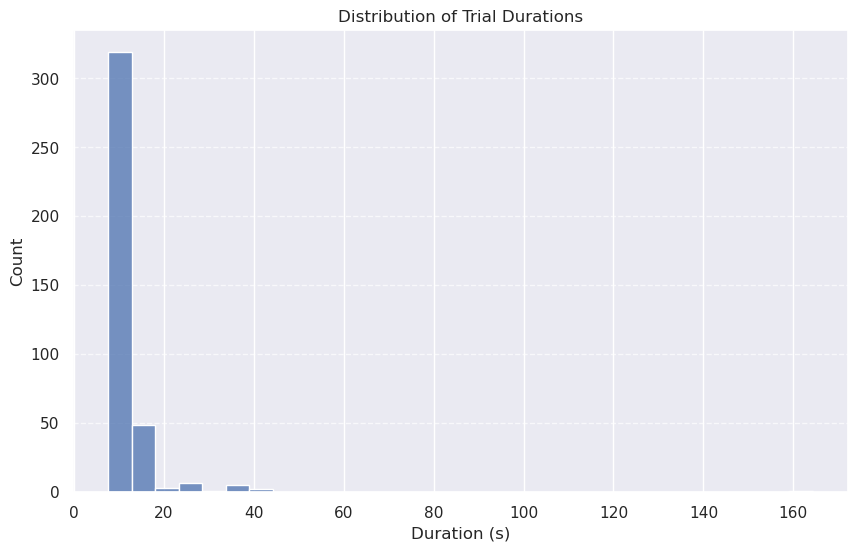

In [3]:
if 'trials' in nwb.intervals:
    print("Accessing trial data...")
    trials = nwb.trials.to_dataframe()

    # Calculate trial durations
    trials['duration'] = trials['stop_time'] - trials['start_time']

    print(f"Found {len(trials)} trials.")
    print("Trial data columns:", list(trials.columns))
    print("\nFirst 5 trials:")
    print(trials.head())

    print("\nSummary statistics for trial durations:")
    print(trials['duration'].describe())

    # Plot histogram of trial durations
    print("\nPlotting distribution of trial durations...")
    sns.set_theme()
    plt.figure(figsize=(10, 6))
    sns.histplot(trials['duration'], bins=30, kde=False) # Removed kde for clarity with skewed data
    plt.title('Distribution of Trial Durations')
    plt.xlabel('Duration (s)')
    plt.ylabel('Count')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.show()

else:
    print("Trial data ('trials') not found in this NWB file.")

The histogram shows the distribution of trial durations. We can observe the typical length of trials and identify any unusually long or short ones. As seen in the plot, most trials are relatively short, with a long tail of longer durations.

## 4. Exploring Sorted Units (Spike Times)

This NWB file contains sorted neuronal units, accessible via `nwb.units`. This is typically a table where each row represents a unit, and it includes information like spike times.

Let's visualize the activity of a few units using a raster plot, which shows spike times over a specific time interval. We will plot the first 100 seconds for units 1, 2, 4, and 5 (Unit 3 was excluded due to plotting issues observed during exploration).

Accessing units data...


Found 33 units.
Unit table columns: ['spike_times']

Selected units for raster plot: [1, 2, 4, 5]

Plotting spike raster for selected units (0.0s - 100.0s)...


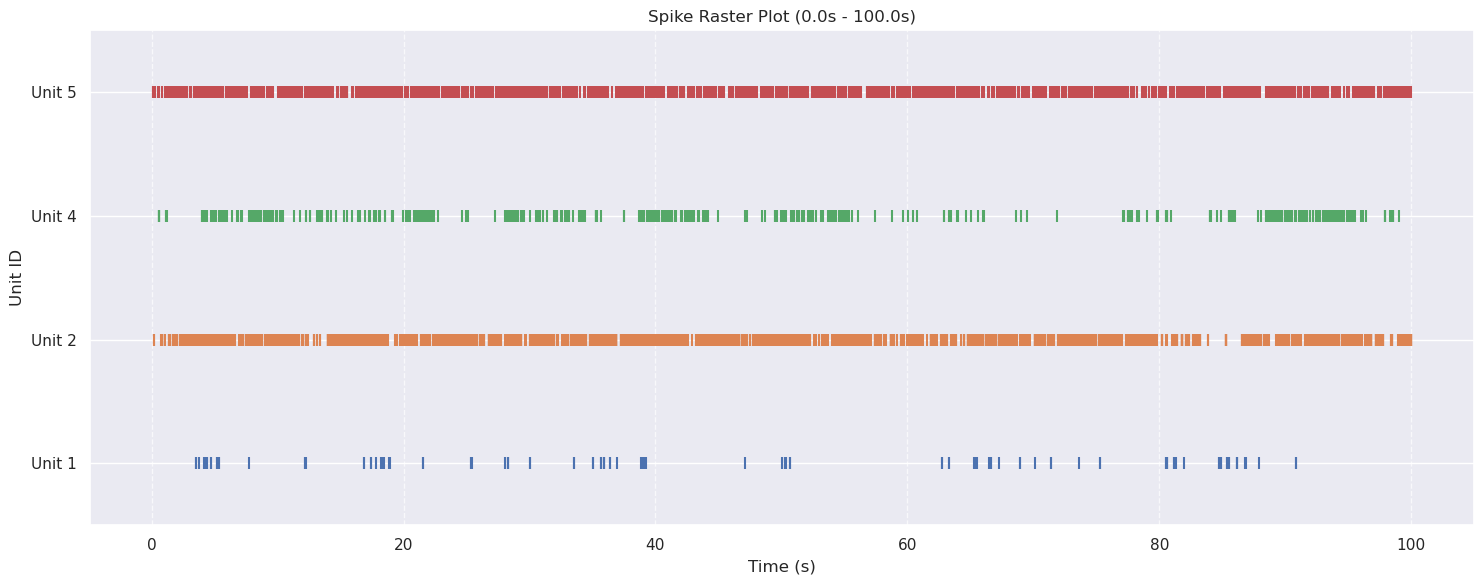

In [4]:
if nwb.units is not None:
    print("Accessing units data...")
    units = nwb.units
    units_df = units.to_dataframe() # Useful for exploring unit properties if needed

    num_units = len(units.id[:]) # Get actual IDs
    print(f"Found {num_units} units.")
    print("Unit table columns:", list(units_df.columns))
    # print("\nFirst 5 units in table:") # Optional: show dataframe head
    # print(units_df.head())

    # Select units to plot (excluding unit 3 based on exploration)
    # Get actual IDs for plotting
    all_unit_ids = units.id[:]
    unit_ids_to_plot = [uid for uid in all_unit_ids if uid != 3][:4] # Select first 4 excluding unit 3
    unit_indices_to_plot = [np.where(all_unit_ids == uid)[0][0] for uid in unit_ids_to_plot]

    print(f"\nSelected units for raster plot: {unit_ids_to_plot}")

    # Define time range for plotting (first 100 seconds)
    plot_start_time = 0.0
    plot_end_time = 100.0

    # --- Create Raster Plot ---
    print(f"\nPlotting spike raster for selected units ({plot_start_time}s - {plot_end_time}s)...")
    sns.set_theme() # Use seaborn theme
    plt.figure(figsize=(15, 6))

    plot_handles = [] # For legend
    for i, unit_idx in enumerate(unit_indices_to_plot):
        unit_id = all_unit_ids[unit_idx]
        # Access spike times for the unit. NOTE: units['spike_times'][unit_idx] accesses the data for the unit at this row index.
        # It does NOT necessarily correspond to unit_id if IDs are not sequential starting from 0.
        spike_times = units['spike_times'][unit_idx]

        # Filter spike times within the plot range
        # Important: Load only necessary spike times if data is large
        # Here we filter after loading, assuming reasonable number of spikes per unit.
        # For very large datasets, more careful slicing before loading might be needed.
        spike_times_in_range = spike_times[(spike_times >= plot_start_time) & (spike_times < plot_end_time)]

        # Plot spikes for this unit
        line, = plt.plot(spike_times_in_range, np.ones_like(spike_times_in_range) * i, '|', markersize=8, markeredgewidth=1.5, label=f'Unit {unit_id}')
        plot_handles.append(line)

    plt.yticks(range(len(unit_ids_to_plot)), [f'Unit {uid}' for uid in unit_ids_to_plot])
    plt.title(f'Spike Raster Plot ({plot_start_time:.1f}s - {plot_end_time:.1f}s)')
    plt.xlabel('Time (s)')
    plt.ylabel('Unit ID')
    plt.ylim(-0.5, len(unit_ids_to_plot) - 0.5)
    # plt.legend(handles=plot_handles, loc='upper right') # Adding legend can clutter raster plots sometimes
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

else:
    print("Units data not found in this NWB file.")

The raster plot visually represents the firing patterns of individual neurons over time. Each vertical tick marks a spike from a specific unit. This helps in understanding the activity levels and temporal dynamics of the recorded neuronal population during the selected time window.

## 5. Exploring Raw Electrophysiology Data

The Dandiset includes raw extracellular recordings, likely stored in `nwb.acquisition`. This data represents the raw voltage fluctuations measured by the recording electrodes. Due to the large size of raw data, we typically load and visualize only small snippets.

Let's load the first second of data for the first 3 recording channels and plot the voltage traces.

Accessing raw electrophysiology time series data...
Found time series data with:
  - Sampling rate: 30000.0 Hz
  - Total channels: 256
  - Data shape: (144675584, 256)
  - Data type: int16
  - Unit: mV

Loading 1.00s (30000 samples) for channels [0, 1, 2]...


Data loaded successfully.

Plotting raw data snippet...


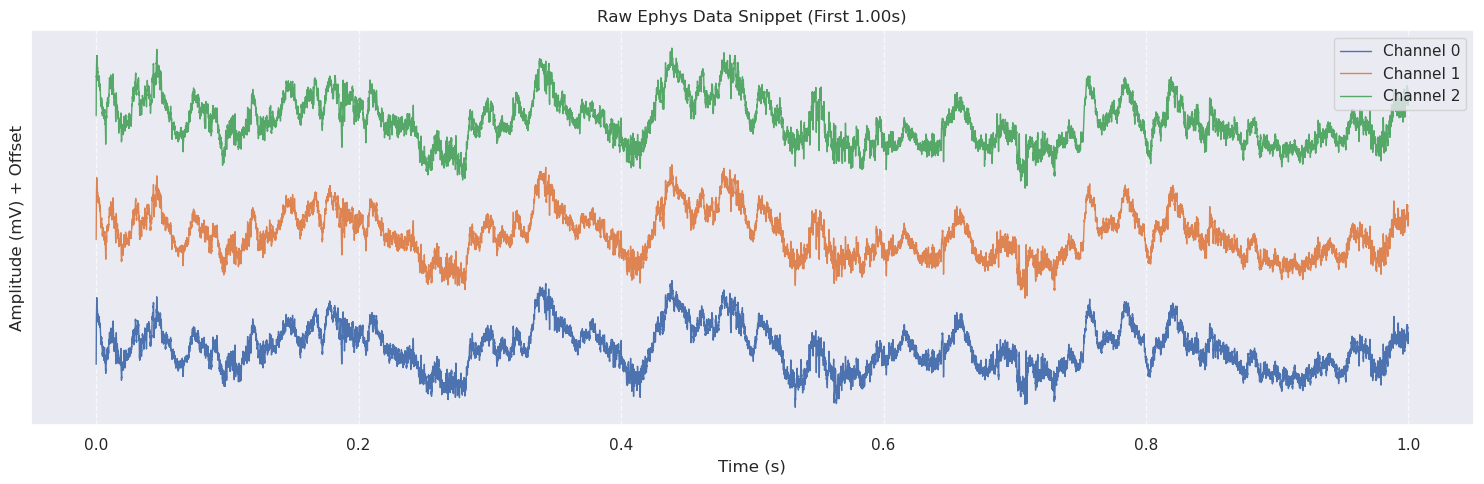

In [5]:
if 'time_series' in nwb.acquisition:
    print("Accessing raw electrophysiology time series data...")
    ts = nwb.acquisition['time_series']
    sampling_rate = ts.rate
    num_channels_total = ts.data.shape[1]

    print(f"Found time series data with:")
    print(f"  - Sampling rate: {sampling_rate} Hz")
    print(f"  - Total channels: {num_channels_total}")
    print(f"  - Data shape: {ts.data.shape}")
    print(f"  - Data type: {ts.data.dtype}")
    print(f"  - Unit: {ts.unit}")

    # Define data snippet to load (e.g., first 1 second, first 3 channels)
    duration_to_load = 1.0  # seconds
    num_samples_to_load = int(sampling_rate * duration_to_load)
    channel_indices = list(range(min(3, num_channels_total))) # Load first 3 or fewer if not available
    num_channels_to_plot = len(channel_indices)

    if num_channels_to_plot > 0:
        print(f"\nLoading {duration_to_load:.2f}s ({num_samples_to_load} samples) for channels {channel_indices}...")

        # Load data snippet - h5py allows efficient slicing
        # NOTE: Reading directly into numpy array loads data into memory.
        # Be cautious with very long durations or many channels.
        try:
            data_snippet = ts.data[:num_samples_to_load, channel_indices]
            print("Data loaded successfully.")

            # Create corresponding time vector
            time_vector = np.arange(num_samples_to_load) / sampling_rate

            # Plot the raw data snippet
            print("\nPlotting raw data snippet...")
            # Use a non-seaborn style for traces if preferred? Reverting to default for clarity.
            # plt.style.use('default') # Optional: Change style
            sns.set_theme() # Re-apply seaborn theme if changed
            plt.figure(figsize=(15, 5))

            # Calculate offset for plotting - based on std deviation of the loaded snippet
            if data_snippet.size > 0:
                 offset_increment = np.std(data_snippet) * 5 # Increase multiplier for better separation
            else:
                 offset_increment = 1 # Default offset if no data

            offset = 0
            plot_handles = []
            for i in range(num_channels_to_plot):
                channel_index = channel_indices[i]
                trace = data_snippet[:, i]
                line, = plt.plot(time_vector, trace + offset, label=f'Channel {channel_index}', linewidth=1)
                plot_handles.append(line)
                offset += offset_increment # Add offset for the next trace

            plt.title(f'Raw Ephys Data Snippet (First {duration_to_load:.2f}s)')
            plt.xlabel('Time (s)')
            # Disable y-ticks as offset makes them less meaningful
            plt.yticks([])
            plt.ylabel(f'Amplitude ({ts.unit}) + Offset')
            plt.legend(handles=plot_handles, loc='upper right')
            plt.grid(axis='x', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"\nError loading or plotting raw data snippet: {e}")
            print("This might be due to file access issues or large data size.")

    else:
        print("No channels selected or available for plotting.")

else:
    print("Raw time series data ('time_series') not found in acquisition.")

This plot shows the raw voltage traces for the selected channels over a short time window. While individual spikes might be hard to resolve at this scale without filtering, we can observe the overall signal characteristics, including baseline fluctuations and potential LFP (Local Field Potential) activity. This demonstrates how to access and visualize the fundamental recording data.

## 6. Summary and Future Directions

This notebook demonstrated the basic steps for accessing and exploring Dandiset 001375 using the DANDI API and standard Python neurophysiology tools. We covered:
*   Connecting to DANDI and retrieving metadata.
*   Listing assets and selecting an NWB file.
*   Loading the NWB file using remote streaming.
*   Visualizing trial durations, spike rasters for sorted units, and snippets of raw electrophysiology data.

**Future Directions:**

Based on this initial exploration, potential next steps could include:
*   Analyzing firing rate changes across different trial conditions or time periods.
*   Investigating correlations in spike timing between different units.
*   Filtering the raw ephys data to analyze LFP oscillations in specific frequency bands (e.g., theta, gamma).
*   Relating neuronal activity (spikes or LFP) to behavioral events if available within the trials table or other metadata.
*   Comparing data across different animals or sessions within the Dandiset (loading other NWB files).
*   Applying more advanced analysis techniques specific to the scientific questions addressed by the study (e.g., effects of DREADD manipulation).

Remember to consult the Dandiset's documentation and associated publications for more context on the experimental design and data details.

---
End of Notebook

In [6]:
# Close the NWB file reader
print("Closing NWB file reader...")
io.close()
print("Reader closed.")

Closing NWB file reader...
Reader closed.
